In [65]:
import pandas as pd #dosya okuma işlemi için (analiz aracı)
import matplotlib.pyplot as plt #çizim için kütüphane
import numpy as np #matematiksel işlemler 
import seaborn as sns #grafik için kütüphane
import datetime 
from sklearn import preprocessing
import seaborn as sns
import plotly.graph_objs as go
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'C:\air\stations.csv')
data.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
id           24 non-null int64
name         24 non-null object
address      24 non-null object
lon          24 non-null float64
lat          24 non-null float64
elevation    24 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


In [4]:
data.drop(columns=['name','address','lon','lat'])

,id,elevation
0,28079004,635
1,28079008,670
2,28079011,708
3,28079016,693
4,28079017,604
5,28079018,630
6,28079024,642
7,28079027,621
8,28079035,659
9,28079036,685


In [5]:
import h5py as h5
f = h5.File(r'C:\air\madrid.h5')
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)

28079001
28079003
28079004
28079006
28079007
28079008
28079009
28079011
28079012
28079014
28079015
28079016
28079017
28079018
28079019
28079021
28079022
28079023
28079024
28079025
28079026
28079027
28079035
28079036
28079038
28079039
28079040
28079047
28079048
28079049
28079050
28079054
28079055
28079056
28079057
28079058
28079059
28079060
28079099
master


In [6]:
with pd.HDFStore('C:/air/madrid.h5') as data:
    df = data['master']
    
df.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [7]:
with pd.HDFStore('C:/air/madrid.h5') as data:
    for k in data.keys():
        print('{}: {}'.format(k, ', '.join(data[k].columns)))

/28079001: CO, NO_2, NOx, O_3, PM10, PM25, SO_2
/28079003: CO, NO_2, NOx, O_3, PM10, SO_2
/28079004: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079006: BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PM25, PXY, SO_2, TCH, TOL
/28079007: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/28079008: BEN, CH4, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/28079009: CO, NO_2, NOx, O_3, PM10, SO_2
/28079011: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/28079012: CO, NMHC, NO_2, NOx, O_3, PM10, SO_2, TCH
/28079014: CO, NO_2, NOx, O_3, PM10, SO_2
/28079015: BEN, CO, EBE, NMHC, NO_2, NOx, O_3, PM10, PM25, SO_2, TCH, TOL
/28079016: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079017: CO, NO, NO_2, NOx, O_3, PM10, SO_2
/28079018: BEN, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, SO_2, TCH, TOL
/28079019: CO, NO_2, NOx, O_3, PM10, SO_2
/28079021: CO, NO_2, NOx, O_3, PM10, SO_2
/28079022: BEN, CO, NO_2, NOx, O_3, PM10, PM25, SO_2, TOL
/28079023: BEN, CO, EBE, NMHC, NO_2, NOx, O_3, PM1

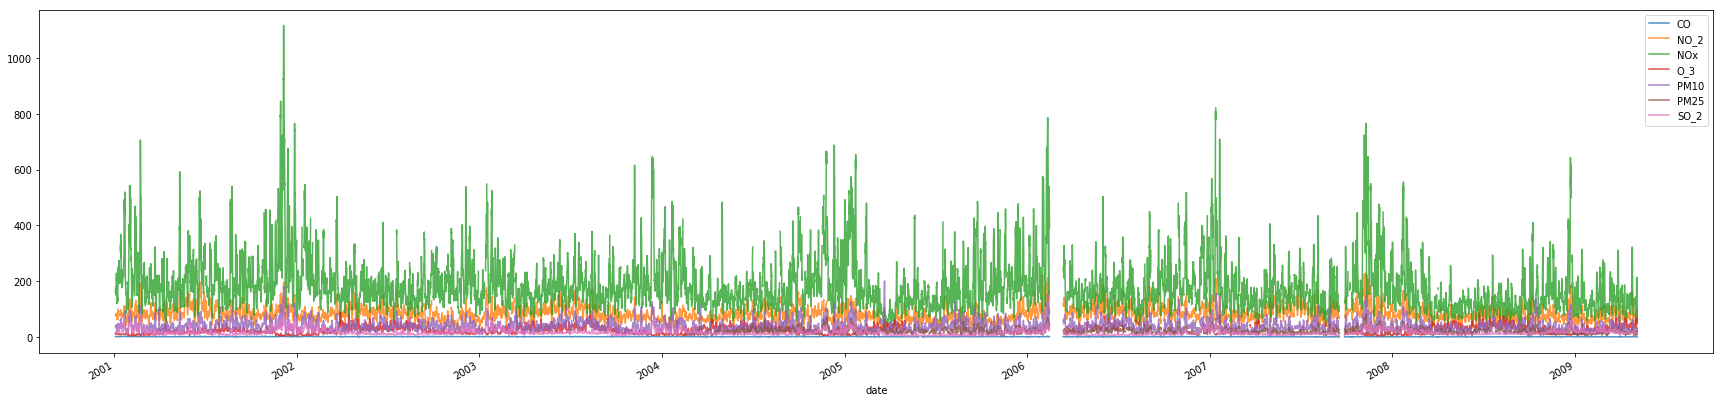

In [8]:
with pd.HDFStore('C:/air/madrid.h5') as data:
    test = data['28079001']
  
test.rolling(window=24).mean().plot(figsize=(30, 7), alpha=0.8)

In [9]:
partials = list()

with pd.HDFStore('C:/air/madrid.h5') as data:
    stations = [k[1:] for k in data.keys() if k != '/master']
    for station in stations:
        df = data[station]
        df['station'] = station
        partials.append(df)
            
df = pd.concat(partials, sort=False).sort_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-01-01 01:00:00 to 2018-05-01 00:00:00
Data columns (total 18 columns):
CO         float64
NO_2       float64
NOx        float64
O_3        float64
PM10       float64
PM25       float64
SO_2       float64
station    object
NO         float64
BEN        float64
EBE        float64
MXY        float64
NMHC       float64
OXY        float64
PXY        float64
TCH        float64
TOL        float64
CH4        float64
dtypes: float64(17), object(1)
memory usage: 552.0+ MB


In [3]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,NaN,0.66,NaN,NaN,NaN,89.550003,118.900002,NaN,40.020000,39.990002,25.860001,NaN,12.20,NaN,NaN,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,NaN,3.38,6.12,1.57,11.37,28079035
2,2004-08-01 01:00:00,NaN,1.02,NaN,NaN,NaN,93.389999,138.600006,NaN,20.860001,49.480000,NaN,NaN,8.99,NaN,NaN,28079003
3,2004-08-01 01:00:00,NaN,0.53,NaN,NaN,NaN,87.290001,105.000000,NaN,36.730000,31.070000,NaN,NaN,8.82,NaN,NaN,28079004
4,2004-08-01 01:00:00,NaN,0.17,NaN,NaN,NaN,34.910000,35.349998,NaN,86.269997,54.080002,NaN,NaN,8.71,NaN,NaN,28079039


In [4]:
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data1

,date,CO,NO_2,NOx,O_3,PM10,PM25,SO_2,station
0,2004-08-01 01:00:00,0.66,89.550003,118.900002,40.020000,39.990002,25.860001,12.20,28079001
5,2004-08-01 01:00:00,0.63,103.800003,144.800003,32.480000,59.110001,38.049999,14.28,28079006
13,2004-08-01 01:00:00,0.40,64.830002,78.709999,62.540001,48.070000,26.570000,7.68,28079015
20,2004-08-01 01:00:00,0.32,61.110001,64.540001,25.270000,51.529999,31.129999,4.59,28079022
22,2004-08-01 01:00:00,0.36,31.980000,32.799999,79.040001,43.549999,22.780001,7.29,28079024
26,2004-08-01 01:00:00,0.46,62.259998,75.470001,54.419998,46.630001,29.459999,8.54,28079099
27,2004-08-01 02:00:00,0.67,84.870003,112.300003,45.500000,93.180000,36.770000,10.57,28079001
32,2004-08-01 02:00:00,0.67,113.500000,165.800003,26.980000,86.930000,45.639999,13.47,28079006
40,2004-08-01 02:00:00,0.38,54.580002,62.580002,68.360001,70.139999,34.439999,7.12,28079015
47,2004-08-01 02:00:00,0.29,60.459999,65.199997,24.670000,81.820000,32.299999,4.13,28079022


In [5]:
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()

CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
SO_2    0
dtype: int64

In [ ]:
data2['SO_2']=pd.Series(np.where(data2.SO_2.values > 10, 1, 0),
          data2.index)
data2.head()
y = data2['SO_2']
y=y.astype('int')
x = data2.drop('SO_2',axis=1)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)
#clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=30, alpha=0.0001,
#                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(x_train, y_train)))
#print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(x_test, y_test)))
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
#trainXEncoded = encoder.transform(trainX)  # Returns a sparse matrix (see numpy.sparse)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=100)
SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    }


    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
    clf.fit(X_train, y_train)
    print('Best parameters found:\n', clf.best_params_)


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
data2['SO_2']=pd.Series(np.where(data2.SO_2.values > 10, 1, 0),
          data2.index)
data2.head()
y = data2['SO_2']
y=y.astype('int')
x = data2.drop('SO_2',axis=1)

clf = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=500, random_state=3, solver='lbfgs')
clf.fit(x, y.values.ravel())

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=6, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [46]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,NaN,0.66,NaN,NaN,NaN,89.550003,118.900002,NaN,40.020000,39.990002,25.860001,NaN,12.20,NaN,NaN,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,NaN,3.38,6.12,1.57,11.37,28079035
2,2004-08-01 01:00:00,NaN,1.02,NaN,NaN,NaN,93.389999,138.600006,NaN,20.860001,49.480000,NaN,NaN,8.99,NaN,NaN,28079003
3,2004-08-01 01:00:00,NaN,0.53,NaN,NaN,NaN,87.290001,105.000000,NaN,36.730000,31.070000,NaN,NaN,8.82,NaN,NaN,28079004
4,2004-08-01 01:00:00,NaN,0.17,NaN,NaN,NaN,34.910000,35.349998,NaN,86.269997,54.080002,NaN,NaN,8.71,NaN,NaN,28079039


In [48]:

data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','SO_2','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]


In [50]:
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()


CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
dtype: int64

In [51]:
data2['PM25']=pd.Series(np.where(data2.PM25.values > 30, 1, 0),
          data2.index)
data2.head()


,CO,NO_2,NOx,O_3,PM10,PM25
0,0.66,89.550003,118.900002,40.020000,39.990002,0
5,0.63,103.800003,144.800003,32.480000,59.110001,1
13,0.40,64.830002,78.709999,62.540001,48.070000,0
20,0.32,61.110001,64.540001,25.270000,51.529999,1
22,0.36,31.980000,32.799999,79.040001,43.549999,0


In [52]:
data2.shape


(49812, 6)

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [54]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [55]:
from sklearn.model_selection import GridSearchCV
X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [57]:
from sklearn.model_selection import GridSearchCV
y = data2['PM25']
y=y.astype('int')
x = data2.iloc[:,0:4]


Training set score for Multi Layer Perceptron: 0.890 1 10
roc
1 10 0.8794072609642629
Test set score for Multi Layer Perceptron: 0.886 1 10


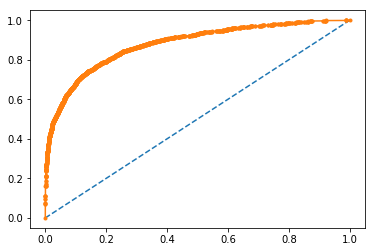

Training set score for Multi Layer Perceptron: 0.889 2 10
roc
2 10 0.8846911857244217
Test set score for Multi Layer Perceptron: 0.885 2 10


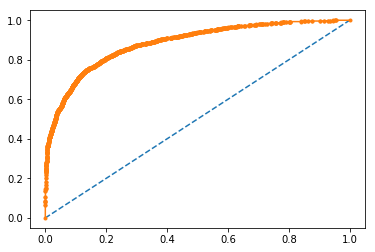

Training set score for Multi Layer Perceptron: 0.888 3 10
roc
3 10 0.8790932215572148
Test set score for Multi Layer Perceptron: 0.888 3 10


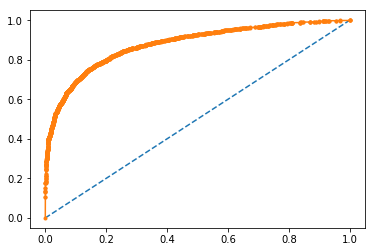

Training set score for Multi Layer Perceptron: 0.888 4 10
roc
4 10 0.8701503998219797
Test set score for Multi Layer Perceptron: 0.888 4 10


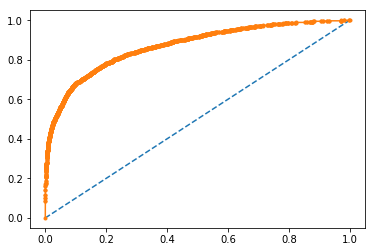

Training set score for Multi Layer Perceptron: 0.889 5 10
roc
5 10 0.8753391795207196
Test set score for Multi Layer Perceptron: 0.886 5 10


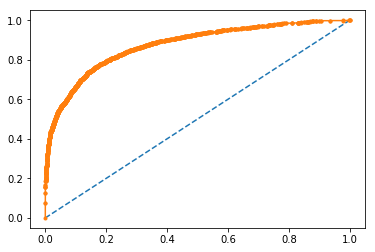

Training set score for Multi Layer Perceptron: 0.889 6 10
roc
6 10 0.8781637091173042
Test set score for Multi Layer Perceptron: 0.888 6 10


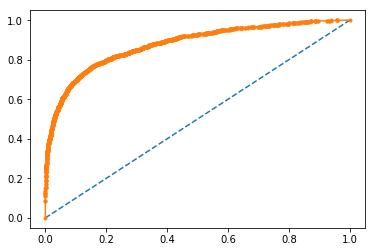

Training set score for Multi Layer Perceptron: 0.888 7 10
roc
7 10 0.8760865474412471
Test set score for Multi Layer Perceptron: 0.889 7 10


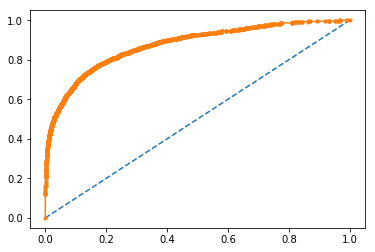

Training set score for Multi Layer Perceptron: 0.888 8 10
roc
8 10 0.8694852340408747
Test set score for Multi Layer Perceptron: 0.890 8 10


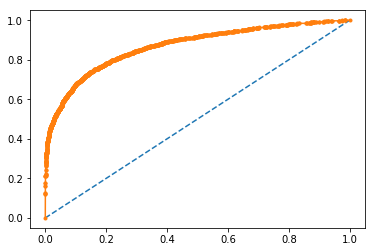

Training set score for Multi Layer Perceptron: 0.888 9 10
roc
9 10 0.8774297455406811
Test set score for Multi Layer Perceptron: 0.887 9 10


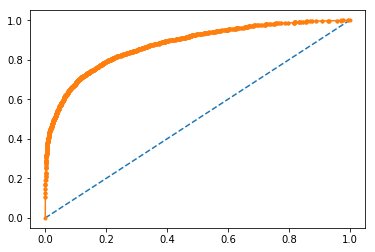

Training set score for Multi Layer Perceptron: 0.888 10 10
roc
10 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.890 10 10


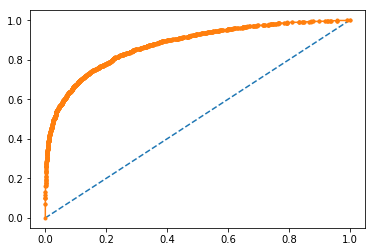

mean_auc 0.8765925776707455
train_auc 0.8884865366759518
test_auc 0.8877546923617384


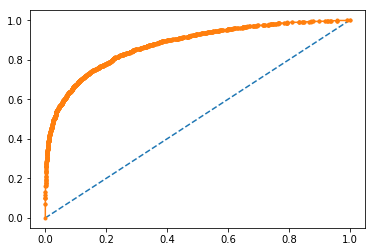

In [59]:

from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
   
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (50, 100, 50), learning_rate= 'adaptive', 
                        solver= 'sgd')
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))
fpr, tpr, thresholds = roc_curve(y_cv, preds)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [31]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()
data2['PM10']=pd.Series(np.where(data2.PM10.values > 40, 1, 0),
          data2.index)
data2.head()
y = data2['PM10']
y=y.astype('int')
x = data2.drop('PM10',axis=1)

clf = neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x, y.values.ravel())

Iteration 1, loss = 0.53136975
Iteration 2, loss = 0.38455554
Iteration 3, loss = 0.37293402
Iteration 4, loss = 0.36402846
Iteration 5, loss = 0.35429374
Iteration 6, loss = 0.34698187
Iteration 7, loss = 0.34059018
Iteration 8, loss = 0.33611926
Iteration 9, loss = 0.33057145
Iteration 10, loss = 0.32817163
Iteration 11, loss = 0.32328374
Iteration 12, loss = 0.31848982
Iteration 13, loss = 0.31520462
Iteration 14, loss = 0.31381093
Iteration 15, loss = 0.31238707
Iteration 16, loss = 0.30858929
Iteration 17, loss = 0.30679086
Iteration 18, loss = 0.30621605
Iteration 19, loss = 0.30446000
Iteration 20, loss = 0.30244607
Iteration 21, loss = 0.30084004
Iteration 22, loss = 0.30014709
Iteration 23, loss = 0.29846582
Iteration 24, loss = 0.29715170
Iteration 25, loss = 0.29654975
Iteration 26, loss = 0.29638726
Iteration 27, loss = 0.29577229
Iteration 28, loss = 0.29516119
Iteration 29, loss = 0.29444082
Iteration 30, loss = 0.29391818
Iteration 31, loss = 0.29416126
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=21, shuffle=True,
       solver='sgd', tol=1e-09, validation_fraction=0.1, verbose=10,
       warm_start=False)

Iteration 1, loss = 0.56097643
Iteration 2, loss = 0.38929897
Iteration 3, loss = 0.37425357
Iteration 4, loss = 0.36621163
Iteration 5, loss = 0.35913341
Iteration 6, loss = 0.35317851
Iteration 7, loss = 0.34842296
Iteration 8, loss = 0.34097206
Iteration 9, loss = 0.33928147
Iteration 10, loss = 0.33460486
Iteration 11, loss = 0.33146000
Iteration 12, loss = 0.32924250
Iteration 13, loss = 0.32405013
Iteration 14, loss = 0.32273751
Iteration 15, loss = 0.32025463
Iteration 16, loss = 0.31692744
Iteration 17, loss = 0.31408705
Iteration 18, loss = 0.31208334
Iteration 19, loss = 0.31019173
Iteration 20, loss = 0.30995828
Iteration 21, loss = 0.30841138
Iteration 22, loss = 0.30570942
Iteration 23, loss = 0.30452811
Iteration 24, loss = 0.30311397
Iteration 25, loss = 0.30263409
Iteration 26, loss = 0.30115035
Iteration 27, loss = 0.30021004
Iteration 28, loss = 0.29874328
Iteration 29, loss = 0.29910362
Iteration 30, loss = 0.29757030
Iteration 31, loss = 0.29708335
Iteration 32, los

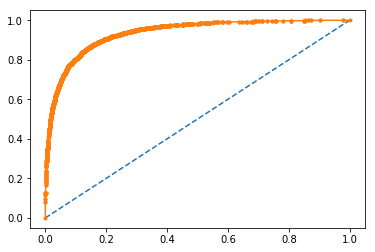

Iteration 1, loss = 0.56055994
Iteration 2, loss = 0.39099692
Iteration 3, loss = 0.37445957
Iteration 4, loss = 0.36644985
Iteration 5, loss = 0.35984789
Iteration 6, loss = 0.35146369
Iteration 7, loss = 0.34703320
Iteration 8, loss = 0.34244814
Iteration 9, loss = 0.33667372
Iteration 10, loss = 0.33161522
Iteration 11, loss = 0.32966062
Iteration 12, loss = 0.32736451
Iteration 13, loss = 0.32378221
Iteration 14, loss = 0.31817309
Iteration 15, loss = 0.31734467
Iteration 16, loss = 0.31407200
Iteration 17, loss = 0.31488005
Iteration 18, loss = 0.31152678
Iteration 19, loss = 0.30975953
Iteration 20, loss = 0.30822904
Iteration 21, loss = 0.30588681
Iteration 22, loss = 0.30413562
Iteration 23, loss = 0.30351091
Iteration 24, loss = 0.30227922
Iteration 25, loss = 0.30076188
Iteration 26, loss = 0.30053653
Iteration 27, loss = 0.30036226
Iteration 28, loss = 0.29903914
Iteration 29, loss = 0.29660946
Iteration 30, loss = 0.29688412
Iteration 31, loss = 0.29611165
Iteration 32, los

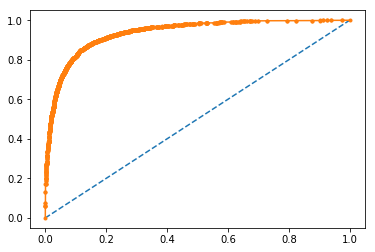

Iteration 1, loss = 0.58703782
Iteration 2, loss = 0.39382164
Iteration 3, loss = 0.38138091
Iteration 4, loss = 0.36932146
Iteration 5, loss = 0.36380656
Iteration 6, loss = 0.35429382
Iteration 7, loss = 0.34945009
Iteration 8, loss = 0.34576828
Iteration 9, loss = 0.34135334
Iteration 10, loss = 0.33683387
Iteration 11, loss = 0.33235646
Iteration 12, loss = 0.32940043
Iteration 13, loss = 0.32722645
Iteration 14, loss = 0.32537832
Iteration 15, loss = 0.32085483
Iteration 16, loss = 0.31746395
Iteration 17, loss = 0.31549656
Iteration 18, loss = 0.31576310
Iteration 19, loss = 0.31233774
Iteration 20, loss = 0.31061610
Iteration 21, loss = 0.30961109
Iteration 22, loss = 0.30717201
Iteration 23, loss = 0.30682075
Iteration 24, loss = 0.30425228
Iteration 25, loss = 0.30255477
Iteration 26, loss = 0.30127309
Iteration 27, loss = 0.30139012
Iteration 28, loss = 0.30003910
Iteration 29, loss = 0.29927297
Iteration 30, loss = 0.29824472
Iteration 31, loss = 0.29809026
Iteration 32, los

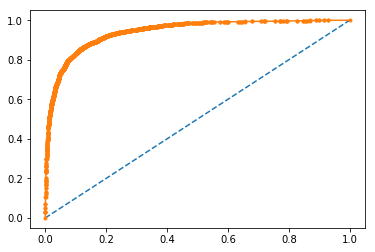

Iteration 1, loss = 0.54968927
Iteration 2, loss = 0.39143922
Iteration 3, loss = 0.37792012
Iteration 4, loss = 0.36699879
Iteration 5, loss = 0.35922847
Iteration 6, loss = 0.35190168
Iteration 7, loss = 0.34838315
Iteration 8, loss = 0.34221295
Iteration 9, loss = 0.33734662
Iteration 10, loss = 0.33505690
Iteration 11, loss = 0.33053728
Iteration 12, loss = 0.32618594
Iteration 13, loss = 0.32435847
Iteration 14, loss = 0.32057363
Iteration 15, loss = 0.31889093
Iteration 16, loss = 0.31508798
Iteration 17, loss = 0.31450807
Iteration 18, loss = 0.31105878
Iteration 19, loss = 0.30942848
Iteration 20, loss = 0.30804658
Iteration 21, loss = 0.30640817
Iteration 22, loss = 0.30707500
Iteration 23, loss = 0.30313120
Iteration 24, loss = 0.30225182
Iteration 25, loss = 0.30187674
Iteration 26, loss = 0.30206082
Iteration 27, loss = 0.29981841
Iteration 28, loss = 0.29817355
Iteration 29, loss = 0.29855453
Iteration 30, loss = 0.29691051
Iteration 31, loss = 0.29601149
Iteration 32, los

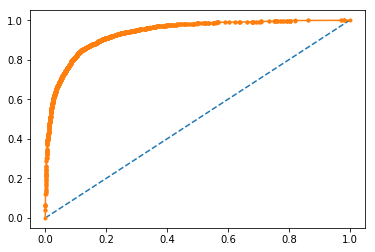

Iteration 1, loss = 0.56649747
Iteration 2, loss = 0.39039644
Iteration 3, loss = 0.37802622
Iteration 4, loss = 0.36841660
Iteration 5, loss = 0.36031539
Iteration 6, loss = 0.35413917
Iteration 7, loss = 0.34957870
Iteration 8, loss = 0.34412106
Iteration 9, loss = 0.34007667
Iteration 10, loss = 0.33447901
Iteration 11, loss = 0.33292489
Iteration 12, loss = 0.32818292
Iteration 13, loss = 0.32456530
Iteration 14, loss = 0.32384302
Iteration 15, loss = 0.31843107
Iteration 16, loss = 0.31888124
Iteration 17, loss = 0.31519845
Iteration 18, loss = 0.31361175
Iteration 19, loss = 0.31326382
Iteration 20, loss = 0.31056579
Iteration 21, loss = 0.30880084
Iteration 22, loss = 0.30708013
Iteration 23, loss = 0.30571886
Iteration 24, loss = 0.30528134
Iteration 25, loss = 0.30558107
Iteration 26, loss = 0.30148426
Iteration 27, loss = 0.30170611
Iteration 28, loss = 0.30047440
Iteration 29, loss = 0.30062807
Iteration 30, loss = 0.29924974
Iteration 31, loss = 0.29890161
Iteration 32, los

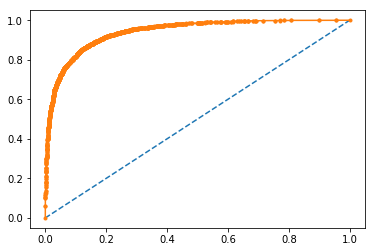

Iteration 1, loss = 0.57789109
Iteration 2, loss = 0.39149957
Iteration 3, loss = 0.37843445
Iteration 4, loss = 0.36829645
Iteration 5, loss = 0.35976462
Iteration 6, loss = 0.35378826
Iteration 7, loss = 0.34900642
Iteration 8, loss = 0.34402846
Iteration 9, loss = 0.34003209
Iteration 10, loss = 0.33489167
Iteration 11, loss = 0.33172703
Iteration 12, loss = 0.32954154
Iteration 13, loss = 0.32558046
Iteration 14, loss = 0.32395353
Iteration 15, loss = 0.31942107
Iteration 16, loss = 0.31742333
Iteration 17, loss = 0.31595134
Iteration 18, loss = 0.31257324
Iteration 19, loss = 0.30916600
Iteration 20, loss = 0.31030255
Iteration 21, loss = 0.30839604
Iteration 22, loss = 0.30776497
Iteration 23, loss = 0.30511474
Iteration 24, loss = 0.30295451
Iteration 25, loss = 0.30253292
Iteration 26, loss = 0.30110321
Iteration 27, loss = 0.30014326
Iteration 28, loss = 0.29924538
Iteration 29, loss = 0.29800247
Iteration 30, loss = 0.29829397
Iteration 31, loss = 0.29705958
Iteration 32, los

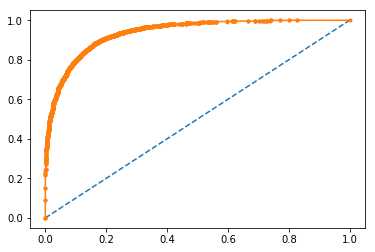

Iteration 1, loss = 0.57351436
Iteration 2, loss = 0.38899512
Iteration 3, loss = 0.37801994
Iteration 4, loss = 0.36819536
Iteration 5, loss = 0.36085242
Iteration 6, loss = 0.35441835
Iteration 7, loss = 0.34947766
Iteration 8, loss = 0.34362041
Iteration 9, loss = 0.33875055
Iteration 10, loss = 0.33447659
Iteration 11, loss = 0.33242604
Iteration 12, loss = 0.32884424
Iteration 13, loss = 0.32447696
Iteration 14, loss = 0.32230705
Iteration 15, loss = 0.31957469
Iteration 16, loss = 0.31730194
Iteration 17, loss = 0.31589838
Iteration 18, loss = 0.31252927
Iteration 19, loss = 0.31164851
Iteration 20, loss = 0.30885584
Iteration 21, loss = 0.30759193
Iteration 22, loss = 0.30597959
Iteration 23, loss = 0.30590355
Iteration 24, loss = 0.30439844
Iteration 25, loss = 0.30317985
Iteration 26, loss = 0.30134572
Iteration 27, loss = 0.29993372
Iteration 28, loss = 0.29916723
Iteration 29, loss = 0.29859635
Iteration 30, loss = 0.29816058
Iteration 31, loss = 0.29778209
Iteration 32, los

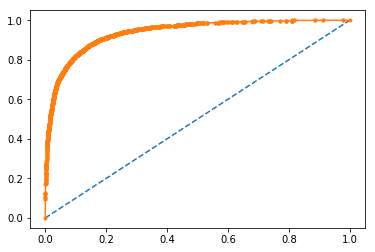

Iteration 1, loss = 0.55751406
Iteration 2, loss = 0.38810111
Iteration 3, loss = 0.37725189
Iteration 4, loss = 0.36550863
Iteration 5, loss = 0.35832217
Iteration 6, loss = 0.35307645
Iteration 7, loss = 0.34825600
Iteration 8, loss = 0.34243151
Iteration 9, loss = 0.33804602
Iteration 10, loss = 0.33353429
Iteration 11, loss = 0.32898888
Iteration 12, loss = 0.32704541
Iteration 13, loss = 0.32416491
Iteration 14, loss = 0.32149606
Iteration 15, loss = 0.31928580
Iteration 16, loss = 0.31603409
Iteration 17, loss = 0.31446295
Iteration 18, loss = 0.31219244
Iteration 19, loss = 0.30940494
Iteration 20, loss = 0.30912935
Iteration 21, loss = 0.30770308
Iteration 22, loss = 0.30762957
Iteration 23, loss = 0.30454316
Iteration 24, loss = 0.30459606
Iteration 25, loss = 0.30205712
Iteration 26, loss = 0.30043097
Iteration 27, loss = 0.30064089
Iteration 28, loss = 0.29959330
Iteration 29, loss = 0.29895885
Iteration 30, loss = 0.29866003
Iteration 31, loss = 0.29752016
Iteration 32, los

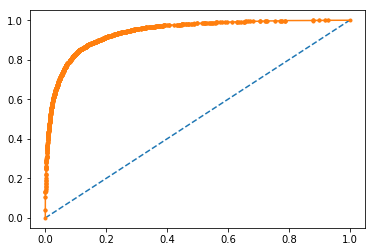

Iteration 1, loss = 0.56265297
Iteration 2, loss = 0.38866384
Iteration 3, loss = 0.37672413
Iteration 4, loss = 0.36813523
Iteration 5, loss = 0.35884038
Iteration 6, loss = 0.35272265
Iteration 7, loss = 0.34734244
Iteration 8, loss = 0.34128955
Iteration 9, loss = 0.33713712
Iteration 10, loss = 0.33565745
Iteration 11, loss = 0.33015180
Iteration 12, loss = 0.32520703
Iteration 13, loss = 0.32501295
Iteration 14, loss = 0.32253662
Iteration 15, loss = 0.31827680
Iteration 16, loss = 0.31607638
Iteration 17, loss = 0.31319675
Iteration 18, loss = 0.31278231
Iteration 19, loss = 0.31099995
Iteration 20, loss = 0.30796954
Iteration 21, loss = 0.30805032
Iteration 22, loss = 0.30640286
Iteration 23, loss = 0.30447646
Iteration 24, loss = 0.30272370
Iteration 25, loss = 0.30088626
Iteration 26, loss = 0.30029646
Iteration 27, loss = 0.29995713
Iteration 28, loss = 0.29994257
Iteration 29, loss = 0.29647591
Iteration 30, loss = 0.29729993
Iteration 31, loss = 0.29558723
Iteration 32, los

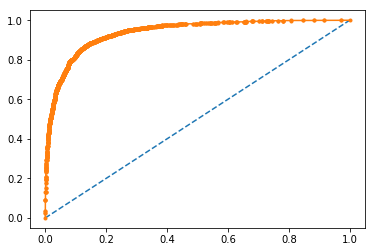

Iteration 1, loss = 0.56989736
Iteration 2, loss = 0.38977361
Iteration 3, loss = 0.37444006
Iteration 4, loss = 0.36728298
Iteration 5, loss = 0.35767792
Iteration 6, loss = 0.35163326
Iteration 7, loss = 0.34616060
Iteration 8, loss = 0.34049043
Iteration 9, loss = 0.33736512
Iteration 10, loss = 0.33098156
Iteration 11, loss = 0.32838178
Iteration 12, loss = 0.32609117
Iteration 13, loss = 0.32238472
Iteration 14, loss = 0.32085304
Iteration 15, loss = 0.31740181
Iteration 16, loss = 0.31459192
Iteration 17, loss = 0.31242102
Iteration 18, loss = 0.30996709
Iteration 19, loss = 0.30929084
Iteration 20, loss = 0.30749571
Iteration 21, loss = 0.30496499
Iteration 22, loss = 0.30430515
Iteration 23, loss = 0.30342710
Iteration 24, loss = 0.30197611
Iteration 25, loss = 0.30024005
Iteration 26, loss = 0.30111223
Iteration 27, loss = 0.29907792
Iteration 28, loss = 0.29875098
Iteration 29, loss = 0.29794815
Iteration 30, loss = 0.29670493
Iteration 31, loss = 0.29573865
Iteration 32, los

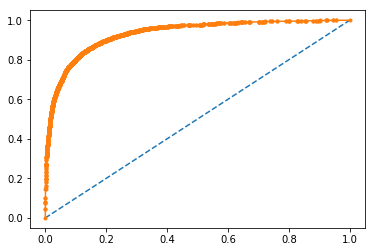

mean_auc 0.937697217274725
train_auc 0.8747081712062256
test_auc 0.8716939451752184


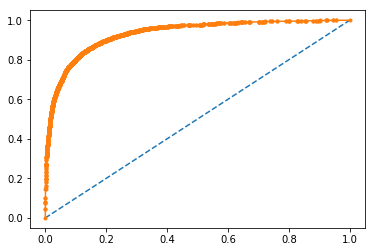

In [33]:
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=21, shuffle=True,
       solver='sgd', tol=1e-09, validation_fraction=0.1, verbose=10,
       warm_start=False)
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))
fpr, tpr, thresholds = roc_curve(y_cv, preds)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [16]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()

CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
SO_2    0
dtype: int64

Iteration 1, loss = 0.31068899
Iteration 2, loss = 0.29804970
Iteration 3, loss = 0.29461682
Iteration 4, loss = 0.29090274
Iteration 5, loss = 0.28983705
Iteration 6, loss = 0.28907956
Iteration 7, loss = 0.28809178
Iteration 8, loss = 0.28626837
Iteration 9, loss = 0.28747213
Iteration 10, loss = 0.28635990
Iteration 11, loss = 0.28546016
Iteration 12, loss = 0.28503385
Iteration 13, loss = 0.28517540
Iteration 14, loss = 0.28416694
Iteration 15, loss = 0.28413656
Iteration 16, loss = 0.28349774
Iteration 17, loss = 0.28344623
Iteration 18, loss = 0.28311851
Iteration 19, loss = 0.28252340
Iteration 20, loss = 0.28277980
Iteration 21, loss = 0.28212638
Iteration 22, loss = 0.28235576
Iteration 23, loss = 0.28163388
Iteration 24, loss = 0.28194090
Iteration 25, loss = 0.28161355
Iteration 26, loss = 0.28132533
Iteration 27, loss = 0.28104364
Iteration 28, loss = 0.28098272
Iteration 29, loss = 0.28048026
Iteration 30, loss = 0.28027163


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.880 1 10
roc
1 10 0.8837159620347053
Test set score for Multi Layer Perceptron: 0.875 1 10


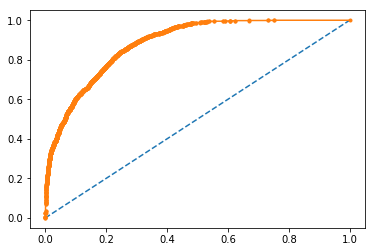

Iteration 1, loss = 0.31749238
Iteration 2, loss = 0.29799966
Iteration 3, loss = 0.29337574
Iteration 4, loss = 0.29175184
Iteration 5, loss = 0.29183386
Iteration 6, loss = 0.29130626
Iteration 7, loss = 0.29060656
Iteration 8, loss = 0.28935937
Iteration 9, loss = 0.28825942
Iteration 10, loss = 0.28804468
Iteration 11, loss = 0.28762175
Iteration 12, loss = 0.28690590
Iteration 13, loss = 0.28688535
Iteration 14, loss = 0.28587700
Iteration 15, loss = 0.28531759
Iteration 16, loss = 0.28519850
Iteration 17, loss = 0.28531131
Iteration 18, loss = 0.28475038
Iteration 19, loss = 0.28500463
Iteration 20, loss = 0.28452294
Iteration 21, loss = 0.28391252
Iteration 22, loss = 0.28394974
Iteration 23, loss = 0.28304962
Iteration 24, loss = 0.28378821
Iteration 25, loss = 0.28305459
Iteration 26, loss = 0.28297297
Iteration 27, loss = 0.28244711
Iteration 28, loss = 0.28324390
Iteration 29, loss = 0.28224295
Iteration 30, loss = 0.28175139
Training set score for Multi Layer Perceptron: 0.

C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



roc
2 10 0.8850533300904152
Test set score for Multi Layer Perceptron: 0.877 2 10


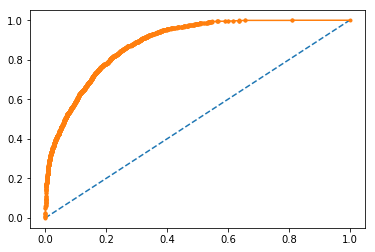

Iteration 1, loss = 0.32456810
Iteration 2, loss = 0.29755284
Iteration 3, loss = 0.29249472
Iteration 4, loss = 0.29181223
Iteration 5, loss = 0.29074927
Iteration 6, loss = 0.28934158
Iteration 7, loss = 0.28915015
Iteration 8, loss = 0.28764994
Iteration 9, loss = 0.28721749
Iteration 10, loss = 0.28786339
Iteration 11, loss = 0.28679254
Iteration 12, loss = 0.28644759
Iteration 13, loss = 0.28623065
Iteration 14, loss = 0.28578675
Iteration 15, loss = 0.28580951
Iteration 16, loss = 0.28546306
Iteration 17, loss = 0.28459050
Iteration 18, loss = 0.28524035
Iteration 19, loss = 0.28472617
Iteration 20, loss = 0.28439103
Iteration 21, loss = 0.28353909
Iteration 22, loss = 0.28379169
Iteration 23, loss = 0.28386970
Iteration 24, loss = 0.28355029
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Training set score for Multi Layer Perceptron: 0.878 3 10
roc
3 10 0.8878361130450841
Test set score for Multi Layer Perceptron: 0.877 3 10


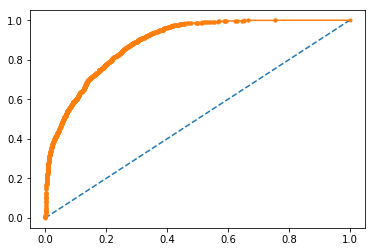

Iteration 1, loss = 0.31315338
Iteration 2, loss = 0.29847996
Iteration 3, loss = 0.29535397
Iteration 4, loss = 0.29263880
Iteration 5, loss = 0.29397318
Iteration 6, loss = 0.29061167
Iteration 7, loss = 0.28935447
Iteration 8, loss = 0.28849628
Iteration 9, loss = 0.28831222
Iteration 10, loss = 0.28703966
Iteration 11, loss = 0.28778149
Iteration 12, loss = 0.28660065
Iteration 13, loss = 0.28639109
Iteration 14, loss = 0.28552974
Iteration 15, loss = 0.28647099
Iteration 16, loss = 0.28587051
Iteration 17, loss = 0.28536559
Iteration 18, loss = 0.28536296
Iteration 19, loss = 0.28477584
Iteration 20, loss = 0.28468037
Iteration 21, loss = 0.28416116
Iteration 22, loss = 0.28357647
Iteration 23, loss = 0.28449962
Iteration 24, loss = 0.28341833
Iteration 25, loss = 0.28347085
Iteration 26, loss = 0.28340623
Iteration 27, loss = 0.28361448
Iteration 28, loss = 0.28312847
Iteration 29, loss = 0.28281137
Iteration 30, loss = 0.28300497
Training set score for Multi Layer Perceptron: 0.

C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



roc
4 10 0.8905500075651054
Test set score for Multi Layer Perceptron: 0.876 4 10


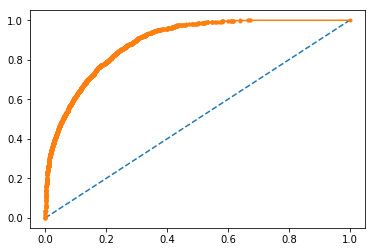

Iteration 1, loss = 0.31381427
Iteration 2, loss = 0.29958429
Iteration 3, loss = 0.29562787
Iteration 4, loss = 0.29326000
Iteration 5, loss = 0.29213833
Iteration 6, loss = 0.29309295
Iteration 7, loss = 0.29111040
Iteration 8, loss = 0.29024469
Iteration 9, loss = 0.28925739
Iteration 10, loss = 0.28950483
Iteration 11, loss = 0.28809847
Iteration 12, loss = 0.28736523
Iteration 13, loss = 0.28758025
Iteration 14, loss = 0.28764912
Iteration 15, loss = 0.28725692
Iteration 16, loss = 0.28685566
Iteration 17, loss = 0.28616788
Iteration 18, loss = 0.28687305
Iteration 19, loss = 0.28614799
Iteration 20, loss = 0.28514001
Iteration 21, loss = 0.28570141
Iteration 22, loss = 0.28547074
Iteration 23, loss = 0.28492386
Iteration 24, loss = 0.28464584
Iteration 25, loss = 0.28428839
Iteration 26, loss = 0.28409008
Iteration 27, loss = 0.28343878
Iteration 28, loss = 0.28455708
Iteration 29, loss = 0.28405366
Iteration 30, loss = 0.28400071
Training loss did not improve more than tol=0.000

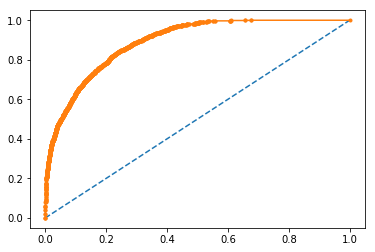

Iteration 1, loss = 0.31328549
Iteration 2, loss = 0.29701364
Iteration 3, loss = 0.29381663
Iteration 4, loss = 0.29280764
Iteration 5, loss = 0.29110416
Iteration 6, loss = 0.28941985
Iteration 7, loss = 0.28869532
Iteration 8, loss = 0.28707557
Iteration 9, loss = 0.28697413
Iteration 10, loss = 0.28640300
Iteration 11, loss = 0.28607862
Iteration 12, loss = 0.28667606
Iteration 13, loss = 0.28569816
Iteration 14, loss = 0.28478759
Iteration 15, loss = 0.28498987
Iteration 16, loss = 0.28465869
Iteration 17, loss = 0.28457134
Iteration 18, loss = 0.28416465
Iteration 19, loss = 0.28345692
Iteration 20, loss = 0.28336110
Iteration 21, loss = 0.28327828
Iteration 22, loss = 0.28267850
Iteration 23, loss = 0.28218876
Iteration 24, loss = 0.28200583
Iteration 25, loss = 0.28234539
Iteration 26, loss = 0.28335581
Iteration 27, loss = 0.28189287
Iteration 28, loss = 0.28165341
Iteration 29, loss = 0.28139533
Iteration 30, loss = 0.28092684


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.877 6 10
roc
6 10 0.8872947024093989
Test set score for Multi Layer Perceptron: 0.874 6 10


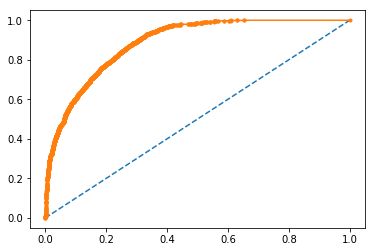

Iteration 1, loss = 0.31322416
Iteration 2, loss = 0.29832012
Iteration 3, loss = 0.29490361
Iteration 4, loss = 0.29329767
Iteration 5, loss = 0.29197915
Iteration 6, loss = 0.29160498
Iteration 7, loss = 0.29016112
Iteration 8, loss = 0.28895092
Iteration 9, loss = 0.28879102
Iteration 10, loss = 0.28872777
Iteration 11, loss = 0.28820957
Iteration 12, loss = 0.28812652
Iteration 13, loss = 0.28704365
Iteration 14, loss = 0.28685279
Iteration 15, loss = 0.28688494
Iteration 16, loss = 0.28602796
Iteration 17, loss = 0.28589107
Iteration 18, loss = 0.28545196
Iteration 19, loss = 0.28533089
Iteration 20, loss = 0.28519403
Iteration 21, loss = 0.28452094
Iteration 22, loss = 0.28433741
Iteration 23, loss = 0.28354851
Iteration 24, loss = 0.28354578
Iteration 25, loss = 0.28380493
Iteration 26, loss = 0.28275641
Iteration 27, loss = 0.28247514
Iteration 28, loss = 0.28246090
Iteration 29, loss = 0.28234361
Iteration 30, loss = 0.28236813


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.877 7 10
roc
7 10 0.8915475025725434
Test set score for Multi Layer Perceptron: 0.874 7 10


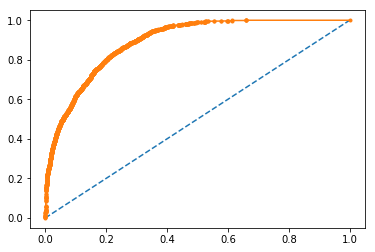

Iteration 1, loss = 0.31594690
Iteration 2, loss = 0.29810399
Iteration 3, loss = 0.29455148
Iteration 4, loss = 0.29236283
Iteration 5, loss = 0.29199037
Iteration 6, loss = 0.29097478
Iteration 7, loss = 0.28963718
Iteration 8, loss = 0.28895982
Iteration 9, loss = 0.28848157
Iteration 10, loss = 0.28725642
Iteration 11, loss = 0.28729217
Iteration 12, loss = 0.28756978
Iteration 13, loss = 0.28645639
Iteration 14, loss = 0.28626537
Iteration 15, loss = 0.28555893
Iteration 16, loss = 0.28491438
Iteration 17, loss = 0.28489737
Iteration 18, loss = 0.28462145
Iteration 19, loss = 0.28446802
Iteration 20, loss = 0.28416580
Iteration 21, loss = 0.28358387
Iteration 22, loss = 0.28311103
Iteration 23, loss = 0.28327747
Iteration 24, loss = 0.28301595
Iteration 25, loss = 0.28350718
Iteration 26, loss = 0.28206492
Iteration 27, loss = 0.28254748
Iteration 28, loss = 0.28255158
Iteration 29, loss = 0.28196584
Iteration 30, loss = 0.28123013


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.878 8 10
roc
8 10 0.8861481284921645
Test set score for Multi Layer Perceptron: 0.877 8 10


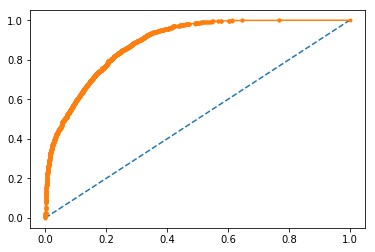

Iteration 1, loss = 0.31468773
Iteration 2, loss = 0.29866967
Iteration 3, loss = 0.29758879
Iteration 4, loss = 0.29299201
Iteration 5, loss = 0.29262735
Iteration 6, loss = 0.29097225
Iteration 7, loss = 0.29045722
Iteration 8, loss = 0.28944805
Iteration 9, loss = 0.28905519
Iteration 10, loss = 0.28864874
Iteration 11, loss = 0.28803250
Iteration 12, loss = 0.28796279
Iteration 13, loss = 0.28694623
Iteration 14, loss = 0.28681980
Iteration 15, loss = 0.28754471
Iteration 16, loss = 0.28594773
Iteration 17, loss = 0.28543646
Iteration 18, loss = 0.28510333
Iteration 19, loss = 0.28524639
Iteration 20, loss = 0.28499738
Iteration 21, loss = 0.28426552
Iteration 22, loss = 0.28429018
Iteration 23, loss = 0.28389417
Iteration 24, loss = 0.28403169
Iteration 25, loss = 0.28330989
Iteration 26, loss = 0.28344424
Iteration 27, loss = 0.28366313
Iteration 28, loss = 0.28338936
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Training set score for

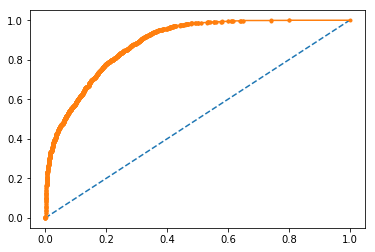

Iteration 1, loss = 0.31576435
Iteration 2, loss = 0.29982236
Iteration 3, loss = 0.29578019
Iteration 4, loss = 0.29371981
Iteration 5, loss = 0.29115436
Iteration 6, loss = 0.29056015
Iteration 7, loss = 0.28952169
Iteration 8, loss = 0.28874921
Iteration 9, loss = 0.28887391
Iteration 10, loss = 0.28807185
Iteration 11, loss = 0.28754839
Iteration 12, loss = 0.28747331
Iteration 13, loss = 0.28691762
Iteration 14, loss = 0.28643043
Iteration 15, loss = 0.28634474
Iteration 16, loss = 0.28527068
Iteration 17, loss = 0.28546682
Iteration 18, loss = 0.28543902
Iteration 19, loss = 0.28500074
Iteration 20, loss = 0.28447605
Iteration 21, loss = 0.28426343
Iteration 22, loss = 0.28430419
Iteration 23, loss = 0.28454340
Iteration 24, loss = 0.28441194
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Training set score for Multi Layer Perceptron: 0.878 10 10
roc
10 10 0.8802890497750454
Test set score for Multi Layer Perceptron: 0.880 10 10


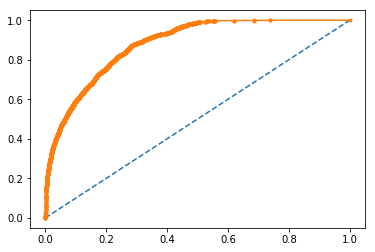

mean_auc 0.8868142794824354
train_auc 0.8780067779590812
test_auc 0.8771563409980923


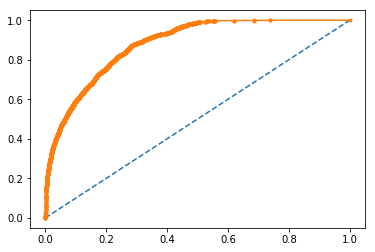

In [17]:
data2['O_3']=pd.Series(np.where(data2.O_3.values > 60, 1, 0),
          data2.index)
data2.head()
y = data2['O_3']
y=y.astype('int')
x = data2.drop('O_3',axis=1)


from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
   

    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))
fpr, tpr, thresholds = roc_curve(y_cv, preds)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(fpr, tpr, marker='.')

pyplot.show()


In [25]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','SO_2','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]

data2=data1.drop(columns=['date','station'])

data2.isnull().sum()

CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
dtype: int64

Iteration 1, loss = 0.33999786
Iteration 2, loss = 0.29708757
Iteration 3, loss = 0.28474574
Iteration 4, loss = 0.27536782
Iteration 5, loss = 0.26496592
Iteration 6, loss = 0.25489342
Iteration 7, loss = 0.25299455
Iteration 8, loss = 0.24750907
Iteration 9, loss = 0.23811331
Iteration 10, loss = 0.23244176
Iteration 11, loss = 0.22880541
Iteration 12, loss = 0.21958867
Iteration 13, loss = 0.22058006
Iteration 14, loss = 0.21346406
Iteration 15, loss = 0.20874605
Iteration 16, loss = 0.20709469
Iteration 17, loss = 0.20406215
Iteration 18, loss = 0.20001255
Iteration 19, loss = 0.19654889
Iteration 20, loss = 0.19265272
Iteration 21, loss = 0.19577832
Iteration 22, loss = 0.19123766
Iteration 23, loss = 0.18521087
Iteration 24, loss = 0.18339641
Iteration 25, loss = 0.18360721
Iteration 26, loss = 0.18510676
Iteration 27, loss = 0.18218907
Iteration 28, loss = 0.18158293
Iteration 29, loss = 0.17505376
Iteration 30, loss = 0.17851197


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.918 1 10
roc
1 10 0.9828439506965615
Test set score for Multi Layer Perceptron: 0.918 1 10


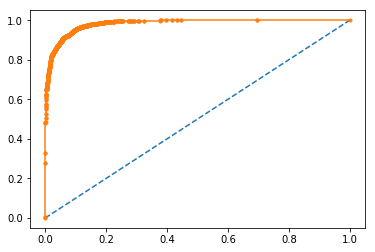

Iteration 1, loss = 0.33768720
Iteration 2, loss = 0.29970977
Iteration 3, loss = 0.28779240
Iteration 4, loss = 0.27618669
Iteration 5, loss = 0.26748979
Iteration 6, loss = 0.25724272
Iteration 7, loss = 0.25450485
Iteration 8, loss = 0.24786288
Iteration 9, loss = 0.23979609
Iteration 10, loss = 0.23659205
Iteration 11, loss = 0.23132632
Iteration 12, loss = 0.22951537
Iteration 13, loss = 0.22003691
Iteration 14, loss = 0.21614469
Iteration 15, loss = 0.21062569
Iteration 16, loss = 0.21038083
Iteration 17, loss = 0.20444089
Iteration 18, loss = 0.20412470
Iteration 19, loss = 0.19890313
Iteration 20, loss = 0.19711127
Iteration 21, loss = 0.19189363
Iteration 22, loss = 0.19616332
Iteration 23, loss = 0.19107902
Iteration 24, loss = 0.18821836
Iteration 25, loss = 0.18881091
Iteration 26, loss = 0.18544586
Iteration 27, loss = 0.18039226
Iteration 28, loss = 0.18366038
Iteration 29, loss = 0.17752613
Iteration 30, loss = 0.18125225
Training set score for Multi Layer Perceptron: 0.

C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.




roc
2 10 0.9835329004611336
Test set score for Multi Layer Perceptron: 0.930 2 10


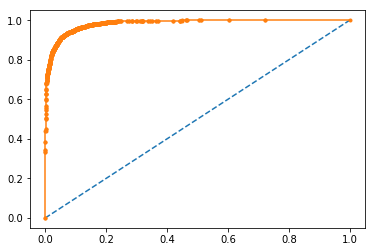

Iteration 1, loss = 0.33656722
Iteration 2, loss = 0.29537833
Iteration 3, loss = 0.28456572
Iteration 4, loss = 0.27469260
Iteration 5, loss = 0.26510386
Iteration 6, loss = 0.25895392
Iteration 7, loss = 0.25144351
Iteration 8, loss = 0.24252020
Iteration 9, loss = 0.23915288
Iteration 10, loss = 0.22957422
Iteration 11, loss = 0.23000974
Iteration 12, loss = 0.22206542
Iteration 13, loss = 0.22219316
Iteration 14, loss = 0.21406328
Iteration 15, loss = 0.20853776
Iteration 16, loss = 0.20498884
Iteration 17, loss = 0.20486600
Iteration 18, loss = 0.20050749
Iteration 19, loss = 0.20102226
Iteration 20, loss = 0.19408033
Iteration 21, loss = 0.19127472
Iteration 22, loss = 0.18753678
Iteration 23, loss = 0.19019632
Iteration 24, loss = 0.18414794
Iteration 25, loss = 0.18660238
Iteration 26, loss = 0.18304134
Iteration 27, loss = 0.17838281
Iteration 28, loss = 0.18037305
Iteration 29, loss = 0.17800743
Iteration 30, loss = 0.17836221


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.884 3 10
roc
3 10 0.9798200471583843
Test set score for Multi Layer Perceptron: 0.876 3 10


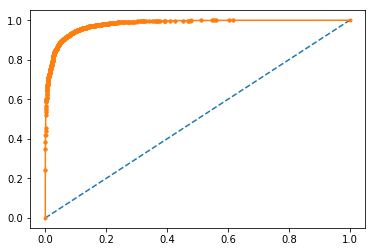

Iteration 1, loss = 0.33438141
Iteration 2, loss = 0.29714439
Iteration 3, loss = 0.28592290
Iteration 4, loss = 0.27458176
Iteration 5, loss = 0.26544170
Iteration 6, loss = 0.26040031
Iteration 7, loss = 0.24722221
Iteration 8, loss = 0.24701928
Iteration 9, loss = 0.23732608
Iteration 10, loss = 0.23147679
Iteration 11, loss = 0.22665280
Iteration 12, loss = 0.22286092
Iteration 13, loss = 0.21738368
Iteration 14, loss = 0.21279971
Iteration 15, loss = 0.20830815
Iteration 16, loss = 0.20332445
Iteration 17, loss = 0.20360273
Iteration 18, loss = 0.20162877
Iteration 19, loss = 0.19016108
Iteration 20, loss = 0.19499990
Iteration 21, loss = 0.19362817
Iteration 22, loss = 0.18795888
Iteration 23, loss = 0.19029034
Iteration 24, loss = 0.18571038
Iteration 25, loss = 0.18218062
Iteration 26, loss = 0.18226746
Iteration 27, loss = 0.17790535
Iteration 28, loss = 0.18002750
Iteration 29, loss = 0.17805987
Iteration 30, loss = 0.17992536
Training loss did not improve more than tol=0.000

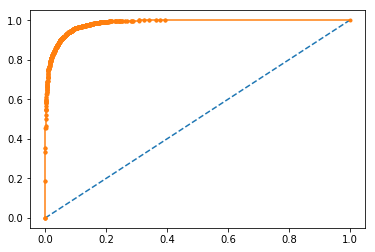

Iteration 1, loss = 0.33373934
Iteration 2, loss = 0.30136484
Iteration 3, loss = 0.28640057
Iteration 4, loss = 0.27573385
Iteration 5, loss = 0.26492084
Iteration 6, loss = 0.25794763
Iteration 7, loss = 0.24873553
Iteration 8, loss = 0.24594001
Iteration 9, loss = 0.24144474
Iteration 10, loss = 0.23396471
Iteration 11, loss = 0.22981385
Iteration 12, loss = 0.21945394
Iteration 13, loss = 0.21966518
Iteration 14, loss = 0.21343343
Iteration 15, loss = 0.20831971
Iteration 16, loss = 0.20565072
Iteration 17, loss = 0.20664130
Iteration 18, loss = 0.20005902
Iteration 19, loss = 0.19841086
Iteration 20, loss = 0.19830408
Iteration 21, loss = 0.19046988
Iteration 22, loss = 0.19061137
Iteration 23, loss = 0.18953093
Iteration 24, loss = 0.18566610
Iteration 25, loss = 0.18690096
Iteration 26, loss = 0.18370818
Iteration 27, loss = 0.17995930
Iteration 28, loss = 0.18195059
Iteration 29, loss = 0.17861079
Iteration 30, loss = 0.17736036


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.927 5 10
roc
5 10 0.9853787585859507
Test set score for Multi Layer Perceptron: 0.925 5 10


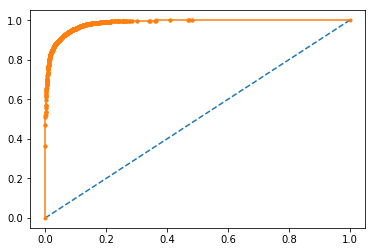

Iteration 1, loss = 0.34181837
Iteration 2, loss = 0.29719596
Iteration 3, loss = 0.28467122
Iteration 4, loss = 0.27415173
Iteration 5, loss = 0.26599542
Iteration 6, loss = 0.25668164
Iteration 7, loss = 0.25065130
Iteration 8, loss = 0.24303309
Iteration 9, loss = 0.23900540
Iteration 10, loss = 0.23362831
Iteration 11, loss = 0.22520720
Iteration 12, loss = 0.22686464
Iteration 13, loss = 0.22027744
Iteration 14, loss = 0.22008528
Iteration 15, loss = 0.21420568
Iteration 16, loss = 0.20746946
Iteration 17, loss = 0.20214157
Iteration 18, loss = 0.19936099
Iteration 19, loss = 0.20146510
Iteration 20, loss = 0.19303728
Iteration 21, loss = 0.19730941
Iteration 22, loss = 0.18816381
Iteration 23, loss = 0.18879705
Iteration 24, loss = 0.18529496
Iteration 25, loss = 0.18537764
Iteration 26, loss = 0.18630980
Iteration 27, loss = 0.18317317
Iteration 28, loss = 0.18266720
Iteration 29, loss = 0.17964078
Iteration 30, loss = 0.17884497


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.923 6 10
roc
6 10 0.983223281642807
Test set score for Multi Layer Perceptron: 0.917 6 10


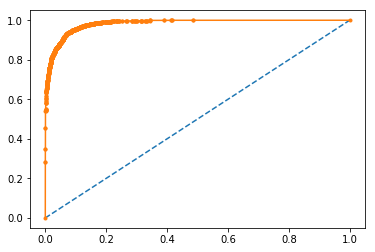

Iteration 1, loss = 0.33639041
Iteration 2, loss = 0.29892620
Iteration 3, loss = 0.28676272
Iteration 4, loss = 0.27533256
Iteration 5, loss = 0.26650091
Iteration 6, loss = 0.25842487
Iteration 7, loss = 0.25131599
Iteration 8, loss = 0.24771488
Iteration 9, loss = 0.24226030
Iteration 10, loss = 0.23711480
Iteration 11, loss = 0.23003515
Iteration 12, loss = 0.22370098
Iteration 13, loss = 0.22278810
Iteration 14, loss = 0.21398556
Iteration 15, loss = 0.21091819
Iteration 16, loss = 0.20924722
Iteration 17, loss = 0.20392505
Iteration 18, loss = 0.20204070
Iteration 19, loss = 0.19763708
Iteration 20, loss = 0.19924224
Iteration 21, loss = 0.19668678
Iteration 22, loss = 0.19113978
Iteration 23, loss = 0.18937221
Iteration 24, loss = 0.18617685
Iteration 25, loss = 0.18407025
Iteration 26, loss = 0.18628239
Iteration 27, loss = 0.18175243
Iteration 28, loss = 0.18181297
Iteration 29, loss = 0.17732464
Iteration 30, loss = 0.18120509


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.899 7 10
roc
7 10 0.9833475404673544
Test set score for Multi Layer Perceptron: 0.897 7 10


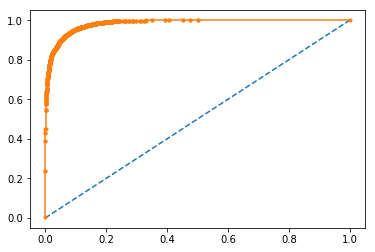

Iteration 1, loss = 0.33905232
Iteration 2, loss = 0.29913733
Iteration 3, loss = 0.28587440
Iteration 4, loss = 0.27441190
Iteration 5, loss = 0.26567493
Iteration 6, loss = 0.25971415
Iteration 7, loss = 0.24927733
Iteration 8, loss = 0.24535360
Iteration 9, loss = 0.23846200
Iteration 10, loss = 0.23059754
Iteration 11, loss = 0.23039815
Iteration 12, loss = 0.22682076
Iteration 13, loss = 0.21876767
Iteration 14, loss = 0.21180657
Iteration 15, loss = 0.21103541
Iteration 16, loss = 0.20279737
Iteration 17, loss = 0.20014614
Iteration 18, loss = 0.20187699
Iteration 19, loss = 0.19142030
Iteration 20, loss = 0.19241409
Iteration 21, loss = 0.19114790
Iteration 22, loss = 0.18978516
Iteration 23, loss = 0.18772142
Iteration 24, loss = 0.18274721
Iteration 25, loss = 0.18420701
Iteration 26, loss = 0.17899893
Iteration 27, loss = 0.17962363
Iteration 28, loss = 0.18335413
Iteration 29, loss = 0.17516798
Iteration 30, loss = 0.17907106


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.889 8 10
roc
8 10 0.979902232130404
Test set score for Multi Layer Perceptron: 0.888 8 10


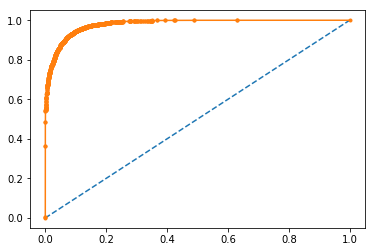

Iteration 1, loss = 0.33475136
Iteration 2, loss = 0.29988978
Iteration 3, loss = 0.28717621
Iteration 4, loss = 0.27485291
Iteration 5, loss = 0.26778103
Iteration 6, loss = 0.26049642
Iteration 7, loss = 0.25086922
Iteration 8, loss = 0.24271580
Iteration 9, loss = 0.24165693
Iteration 10, loss = 0.23638270
Iteration 11, loss = 0.22833577
Iteration 12, loss = 0.22709075
Iteration 13, loss = 0.21711440
Iteration 14, loss = 0.21374770
Iteration 15, loss = 0.21580780
Iteration 16, loss = 0.20502899
Iteration 17, loss = 0.20203942
Iteration 18, loss = 0.20021134
Iteration 19, loss = 0.20375703
Iteration 20, loss = 0.19468876
Iteration 21, loss = 0.19356493
Iteration 22, loss = 0.19447560
Iteration 23, loss = 0.18492986
Iteration 24, loss = 0.18989944
Iteration 25, loss = 0.18552797
Iteration 26, loss = 0.18231982
Iteration 27, loss = 0.18368966
Iteration 28, loss = 0.18279235
Iteration 29, loss = 0.18078939
Iteration 30, loss = 0.17777709


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.933 9 10
roc
9 10 0.9859600030330066
Test set score for Multi Layer Perceptron: 0.936 9 10


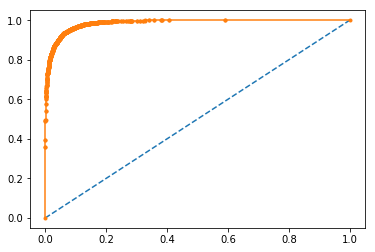

Iteration 1, loss = 0.33387348
Iteration 2, loss = 0.29628860
Iteration 3, loss = 0.28529641
Iteration 4, loss = 0.27274092
Iteration 5, loss = 0.26374667
Iteration 6, loss = 0.25554427
Iteration 7, loss = 0.24819000
Iteration 8, loss = 0.24577532
Iteration 9, loss = 0.23249157
Iteration 10, loss = 0.23475657
Iteration 11, loss = 0.22718594
Iteration 12, loss = 0.21959792
Iteration 13, loss = 0.21745368
Iteration 14, loss = 0.21428152
Iteration 15, loss = 0.20574998
Iteration 16, loss = 0.20366144
Iteration 17, loss = 0.20385000
Iteration 18, loss = 0.19860729
Iteration 19, loss = 0.19421299
Iteration 20, loss = 0.19188461
Iteration 21, loss = 0.18946301
Iteration 22, loss = 0.18386975
Iteration 23, loss = 0.18579589
Iteration 24, loss = 0.18530576
Iteration 25, loss = 0.18429850
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Training set score for Multi Layer Perceptron: 0.930 10 10
roc
10 10 0.9814276435403216
Test set score for Multi Layer

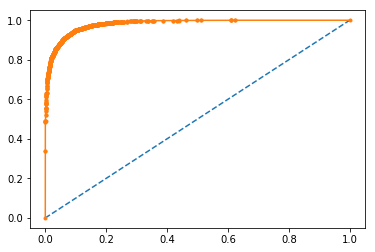

mean_auc 0.9829362199551449
train_auc 0.9163115762001557
test_auc 0.9141122151962261


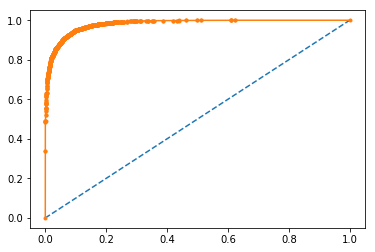

In [26]:
data2['NOx']=pd.Series(np.where(data2.NOx.values > 100, 1, 0),
          data2.index)
data2.head()
y = data2['NOx']
y=y.astype('int')
x = data2.drop('NOx',axis=1)

from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))
fpr, tpr, thresholds = roc_curve(y_cv, preds)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()


In [20]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()

CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
SO_2    0
dtype: int64

Iteration 1, loss = 0.47429812
Iteration 2, loss = 0.32420713
Iteration 3, loss = 0.31122622
Iteration 4, loss = 0.30275549
Iteration 5, loss = 0.29416456
Iteration 6, loss = 0.28813115
Iteration 7, loss = 0.28120078
Iteration 8, loss = 0.27578823
Iteration 9, loss = 0.27166299
Iteration 10, loss = 0.26713865
Iteration 11, loss = 0.26093019
Iteration 12, loss = 0.25953887
Iteration 13, loss = 0.25350234
Iteration 14, loss = 0.24915381
Iteration 15, loss = 0.24710726
Iteration 16, loss = 0.24376948
Iteration 17, loss = 0.24047782
Iteration 18, loss = 0.24125062
Iteration 19, loss = 0.23740452
Iteration 20, loss = 0.23395257
Iteration 21, loss = 0.23307608
Iteration 22, loss = 0.23159281
Iteration 23, loss = 0.22865095
Iteration 24, loss = 0.22925507
Iteration 25, loss = 0.22831884
Iteration 26, loss = 0.22526537
Iteration 27, loss = 0.22434773
Iteration 28, loss = 0.22309808
Iteration 29, loss = 0.22082905
Iteration 30, loss = 0.21993173
Training set score for Multi Layer Perceptron: 0.

C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



roc
1 10 0.9716103762447088
Test set score for Multi Layer Perceptron: 0.891 1 10


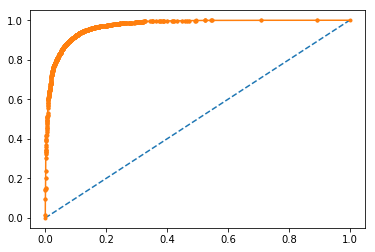

Iteration 1, loss = 0.46954512
Iteration 2, loss = 0.32320803
Iteration 3, loss = 0.31014478
Iteration 4, loss = 0.30163055
Iteration 5, loss = 0.29291564
Iteration 6, loss = 0.28771561
Iteration 7, loss = 0.27878527
Iteration 8, loss = 0.27243340
Iteration 9, loss = 0.26978846
Iteration 10, loss = 0.26406963
Iteration 11, loss = 0.25948787
Iteration 12, loss = 0.26240356
Iteration 13, loss = 0.25149725
Iteration 14, loss = 0.24715877
Iteration 15, loss = 0.24627973
Iteration 16, loss = 0.24171848
Iteration 17, loss = 0.24041954
Iteration 18, loss = 0.24010469
Iteration 19, loss = 0.23484026
Iteration 20, loss = 0.23508768
Iteration 21, loss = 0.23223861
Iteration 22, loss = 0.22765659
Iteration 23, loss = 0.22795585
Iteration 24, loss = 0.22633303
Iteration 25, loss = 0.22439984
Iteration 26, loss = 0.22454216
Iteration 27, loss = 0.22292953
Iteration 28, loss = 0.22024105
Iteration 29, loss = 0.22145384
Iteration 30, loss = 0.21840316


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.904 2 10
roc
2 10 0.9692583457981777
Test set score for Multi Layer Perceptron: 0.897 2 10


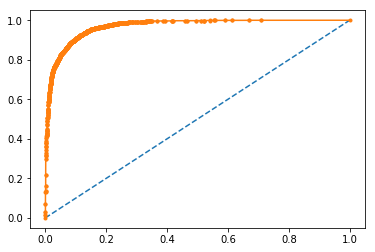

Iteration 1, loss = 0.50584103
Iteration 2, loss = 0.32298616
Iteration 3, loss = 0.30926967
Iteration 4, loss = 0.29913463
Iteration 5, loss = 0.29030775
Iteration 6, loss = 0.28448454
Iteration 7, loss = 0.27825918
Iteration 8, loss = 0.27002692
Iteration 9, loss = 0.26743210
Iteration 10, loss = 0.26165932
Iteration 11, loss = 0.25964788
Iteration 12, loss = 0.25339817
Iteration 13, loss = 0.25415989
Iteration 14, loss = 0.24727050
Iteration 15, loss = 0.24312677
Iteration 16, loss = 0.24205935
Iteration 17, loss = 0.23970898
Iteration 18, loss = 0.24027992
Iteration 19, loss = 0.23522324
Iteration 20, loss = 0.23194985
Iteration 21, loss = 0.23136062
Iteration 22, loss = 0.22879308
Iteration 23, loss = 0.22780884
Iteration 24, loss = 0.22723420
Iteration 25, loss = 0.22539255
Iteration 26, loss = 0.22552402
Iteration 27, loss = 0.22358549
Iteration 28, loss = 0.22159675
Iteration 29, loss = 0.22286082
Iteration 30, loss = 0.21921822


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.906 3 10
roc
3 10 0.9720996169584019
Test set score for Multi Layer Perceptron: 0.907 3 10


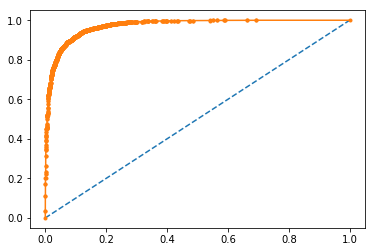

Iteration 1, loss = 0.46526893
Iteration 2, loss = 0.32725797
Iteration 3, loss = 0.31974038
Iteration 4, loss = 0.30345290
Iteration 5, loss = 0.29589951
Iteration 6, loss = 0.28683302
Iteration 7, loss = 0.28087153
Iteration 8, loss = 0.27474508
Iteration 9, loss = 0.26821331
Iteration 10, loss = 0.26693276
Iteration 11, loss = 0.25949823
Iteration 12, loss = 0.25941034
Iteration 13, loss = 0.25256877
Iteration 14, loss = 0.24762441
Iteration 15, loss = 0.24632042
Iteration 16, loss = 0.24222580
Iteration 17, loss = 0.24090452
Iteration 18, loss = 0.23942722
Iteration 19, loss = 0.23748529
Iteration 20, loss = 0.23438875
Iteration 21, loss = 0.23019027
Iteration 22, loss = 0.22970956
Iteration 23, loss = 0.22792731
Iteration 24, loss = 0.23644438
Iteration 25, loss = 0.22683915
Iteration 26, loss = 0.22464459
Iteration 27, loss = 0.22244021
Iteration 28, loss = 0.22295704
Iteration 29, loss = 0.21989068
Iteration 30, loss = 0.22016268


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.901 4 10
roc
4 10 0.9720729275158301
Test set score for Multi Layer Perceptron: 0.898 4 10


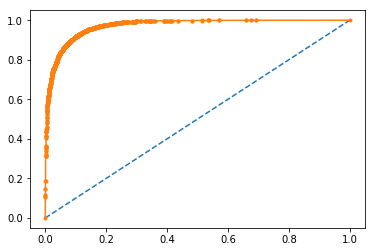

Iteration 1, loss = 0.48524040
Iteration 2, loss = 0.32497173
Iteration 3, loss = 0.31458818
Iteration 4, loss = 0.30323762
Iteration 5, loss = 0.29430805
Iteration 6, loss = 0.28828974
Iteration 7, loss = 0.28159146
Iteration 8, loss = 0.27466509
Iteration 9, loss = 0.27111992
Iteration 10, loss = 0.26456268
Iteration 11, loss = 0.26282955
Iteration 12, loss = 0.25580363
Iteration 13, loss = 0.25297533
Iteration 14, loss = 0.25155329
Iteration 15, loss = 0.24406574
Iteration 16, loss = 0.24298120
Iteration 17, loss = 0.24094754
Iteration 18, loss = 0.23713150
Iteration 19, loss = 0.23625385
Iteration 20, loss = 0.23352626
Iteration 21, loss = 0.23181787
Iteration 22, loss = 0.23230354
Iteration 23, loss = 0.22835386
Iteration 24, loss = 0.22849769
Iteration 25, loss = 0.22758510
Iteration 26, loss = 0.22533420
Iteration 27, loss = 0.22417629
Iteration 28, loss = 0.22194045
Iteration 29, loss = 0.22744244
Iteration 30, loss = 0.22178118


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.908 5 10
roc
5 10 0.9710520731210386
Test set score for Multi Layer Perceptron: 0.907 5 10


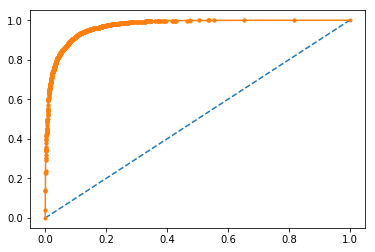

Iteration 1, loss = 0.47392688
Iteration 2, loss = 0.32542606
Iteration 3, loss = 0.32900073
Iteration 4, loss = 0.30123318
Iteration 5, loss = 0.29124859
Iteration 6, loss = 0.28394202
Iteration 7, loss = 0.27813955
Iteration 8, loss = 0.27146055
Iteration 9, loss = 0.26841639
Iteration 10, loss = 0.26148345
Iteration 11, loss = 0.25689124
Iteration 12, loss = 0.25321523
Iteration 13, loss = 0.24922562
Iteration 14, loss = 0.24704872
Iteration 15, loss = 0.24438227
Iteration 16, loss = 0.24179472
Iteration 17, loss = 0.23831123
Iteration 18, loss = 0.23687612
Iteration 19, loss = 0.23316660
Iteration 20, loss = 0.23021493
Iteration 21, loss = 0.22996024
Iteration 22, loss = 0.22593705
Iteration 23, loss = 0.22718610
Iteration 24, loss = 0.22574450
Iteration 25, loss = 0.22296390
Iteration 26, loss = 0.22310852
Iteration 27, loss = 0.22018038
Iteration 28, loss = 0.22020013
Iteration 29, loss = 0.21962560
Iteration 30, loss = 0.21684276


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.912 6 10
roc
6 10 0.9710173327070901
Test set score for Multi Layer Perceptron: 0.908 6 10


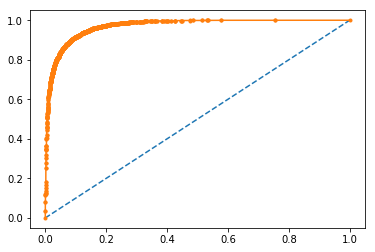

Iteration 1, loss = 0.48095086
Iteration 2, loss = 0.32386734
Iteration 3, loss = 0.31381793
Iteration 4, loss = 0.30269134
Iteration 5, loss = 0.29425686
Iteration 6, loss = 0.28927499
Iteration 7, loss = 0.28216190
Iteration 8, loss = 0.27485611
Iteration 9, loss = 0.27027552
Iteration 10, loss = 0.26857505
Iteration 11, loss = 0.25989058
Iteration 12, loss = 0.25854896
Iteration 13, loss = 0.25222267
Iteration 14, loss = 0.25076342
Iteration 15, loss = 0.24745805
Iteration 16, loss = 0.24459392
Iteration 17, loss = 0.24242638
Iteration 18, loss = 0.24369327
Iteration 19, loss = 0.23593784
Iteration 20, loss = 0.23371807
Iteration 21, loss = 0.23137927
Iteration 22, loss = 0.23197798
Iteration 23, loss = 0.22819739
Iteration 24, loss = 0.22758600
Iteration 25, loss = 0.22546834
Iteration 26, loss = 0.22482213
Iteration 27, loss = 0.22321841
Iteration 28, loss = 0.22324725
Iteration 29, loss = 0.22134913
Iteration 30, loss = 0.21977721


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.887 7 10
roc
7 10 0.9702096550624758
Test set score for Multi Layer Perceptron: 0.885 7 10


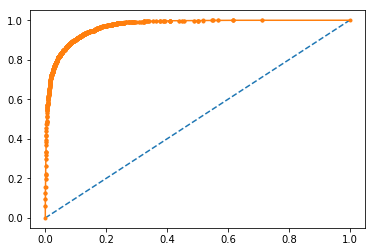

Iteration 1, loss = 0.46917586
Iteration 2, loss = 0.32399094
Iteration 3, loss = 0.31217731
Iteration 4, loss = 0.30203776
Iteration 5, loss = 0.29414433
Iteration 6, loss = 0.28669127
Iteration 7, loss = 0.28590925
Iteration 8, loss = 0.27671329
Iteration 9, loss = 0.27117331
Iteration 10, loss = 0.26502509
Iteration 11, loss = 0.26034278
Iteration 12, loss = 0.25631760
Iteration 13, loss = 0.25547838
Iteration 14, loss = 0.24723192
Iteration 15, loss = 0.24830926
Iteration 16, loss = 0.24440771
Iteration 17, loss = 0.24007796
Iteration 18, loss = 0.23961265
Iteration 19, loss = 0.23684790
Iteration 20, loss = 0.23323699
Iteration 21, loss = 0.23229759
Iteration 22, loss = 0.22917706
Iteration 23, loss = 0.22806425
Iteration 24, loss = 0.22881293
Iteration 25, loss = 0.22588821
Iteration 26, loss = 0.22402214
Iteration 27, loss = 0.22286086
Iteration 28, loss = 0.22262518
Iteration 29, loss = 0.22088910
Iteration 30, loss = 0.22012199


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.888 8 10
roc
8 10 0.9706941988023774
Test set score for Multi Layer Perceptron: 0.884 8 10


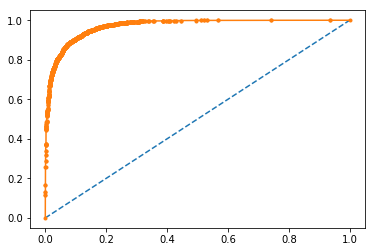

Iteration 1, loss = 0.49652190
Iteration 2, loss = 0.32192445
Iteration 3, loss = 0.30905132
Iteration 4, loss = 0.29974550
Iteration 5, loss = 0.29191644
Iteration 6, loss = 0.28490451
Iteration 7, loss = 0.27775210
Iteration 8, loss = 0.27623325
Iteration 9, loss = 0.26757857
Iteration 10, loss = 0.26351839
Iteration 11, loss = 0.25818733
Iteration 12, loss = 0.25466714
Iteration 13, loss = 0.25163883
Iteration 14, loss = 0.24903073
Iteration 15, loss = 0.24452046
Iteration 16, loss = 0.24283421
Iteration 17, loss = 0.23996980
Iteration 18, loss = 0.26134388
Iteration 19, loss = 0.23711575
Iteration 20, loss = 0.23464508
Iteration 21, loss = 0.23165442
Iteration 22, loss = 0.23110564
Iteration 23, loss = 0.23031311
Iteration 24, loss = 0.22816241
Iteration 25, loss = 0.22608002
Iteration 26, loss = 0.22384992
Iteration 27, loss = 0.22352180
Iteration 28, loss = 0.22324934
Iteration 29, loss = 0.22108704
Iteration 30, loss = 0.21968710


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.905 9 10
roc
9 10 0.9715426011400503
Test set score for Multi Layer Perceptron: 0.902 9 10


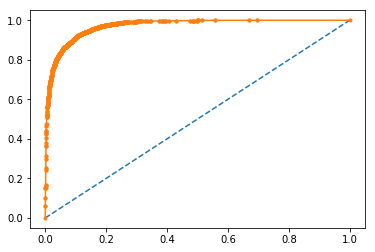

Iteration 1, loss = 0.45753114
Iteration 2, loss = 0.32865759
Iteration 3, loss = 0.31341781
Iteration 4, loss = 0.30378371
Iteration 5, loss = 0.29770234
Iteration 6, loss = 0.28688485
Iteration 7, loss = 0.28270965
Iteration 8, loss = 0.27485318
Iteration 9, loss = 0.26877507
Iteration 10, loss = 0.26540805
Iteration 11, loss = 0.26101249
Iteration 12, loss = 0.25567447
Iteration 13, loss = 0.25216296
Iteration 14, loss = 0.24845259
Iteration 15, loss = 0.25250291
Iteration 16, loss = 0.24215859
Iteration 17, loss = 0.24222092
Iteration 18, loss = 0.24104905
Iteration 19, loss = 0.23694011
Iteration 20, loss = 0.23514697
Iteration 21, loss = 0.23316027
Iteration 22, loss = 0.23030893
Iteration 23, loss = 0.22692710
Iteration 24, loss = 0.22691517
Iteration 25, loss = 0.22636219
Iteration 26, loss = 0.22536491
Iteration 27, loss = 0.22342617
Iteration 28, loss = 0.22368445
Iteration 29, loss = 0.22236620
Iteration 30, loss = 0.22044225


C:\Users\arise\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



Training set score for Multi Layer Perceptron: 0.910 10 10
roc
10 10 0.9721168029708949
Test set score for Multi Layer Perceptron: 0.910 10 10


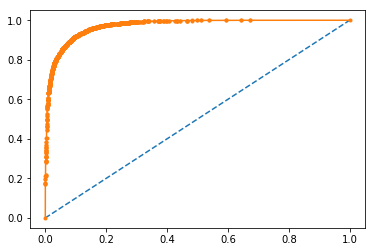

mean_auc 0.9711673930321046
train_auc 0.901757248650684
test_auc 0.898925594939251


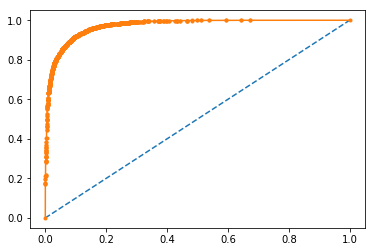

In [21]:
data2['NO_2']=pd.Series(np.where(data2.NO_2.values > 60, 1, 0),
          data2.index)
data2.head()
y = data2['NO_2']
y=y.astype('int')
x = data2.drop('NO_2',axis=1)

from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))




fpr, tpr, thresholds = roc_curve(y_cv, preds)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()


In [66]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()

CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
SO_2    0
dtype: int64

In [67]:
y = data2['CO']
y=y.astype('int')
x = data2.drop('CO',axis=1)

from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

SEED=21
mean_auc = 0.0
train_auc = 0.0
test_auc = 0.0
n = 10  
for i in range(n):
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
    x, y, test_size=.20, random_state=i*SEED)
    clf = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), 
                        learning_rate= 'adaptive', solver= 'adam')
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]
    print("Training set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_train, y_train)), i+1 , n)
    print("roc")
    print (i + 1, n, roc_auc)
    print("Test set score for Multi Layer Perceptron: {:.3f}".format(clf.score(X_cv, y_cv)), i+1 , n)
    train_auc +=clf.score(X_train, y_train)
    test_auc +=clf.score(X_cv, y_cv)
    mean_auc += roc_auc
   
    

print ("mean_auc", (mean_auc/n))
print ("train_auc", (train_auc/n))
print ("test_auc", (test_auc/n))






Training set score for Multi Layer Perceptron: 0.917 1 10
roc
1 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.914 1 10
Training set score for Multi Layer Perceptron: 0.926 2 10
roc
2 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.925 2 10
Training set score for Multi Layer Perceptron: 0.902 3 10
roc
3 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.896 3 10
Training set score for Multi Layer Perceptron: 0.924 4 10
roc
4 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.924 4 10
Training set score for Multi Layer Perceptron: 0.913 5 10
roc
5 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.914 5 10
Training set score for Multi Layer Perceptron: 0.922 6 10
roc
6 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.918 6 10
Training set score for Multi Layer Perceptron: 0.911 7 10
roc
7 10 0.8760792929787491
Test set score for Multi Layer Perceptron: 0.915 7 10
Training set score f

In [24]:
data=pd.read_csv(r'C:\air\csvs\2004.csv')
data1=data[(data.station== 28079001)]
data1=data.drop(columns=['BEN','EBE','MXY','NMHC','OXY','PXY','TCH','TOL'])
data1 = data1[np.isfinite(data1['CO'])]
data1 = data1[np.isfinite(data1['NO_2'])]
data1 = data1[np.isfinite(data1['NOx'])]
data1 = data1[np.isfinite(data1['O_3'])]
data1 = data1[np.isfinite(data1['PM10'])]
data1 = data1[np.isfinite(data1['PM25'])]
data1 = data1[np.isfinite(data1['SO_2'])]
data2=data1.drop(columns=['date','station'])

data2.isnull().sum()


CO      0
NO_2    0
NOx     0
O_3     0
PM10    0
PM25    0
SO_2    0
dtype: int64

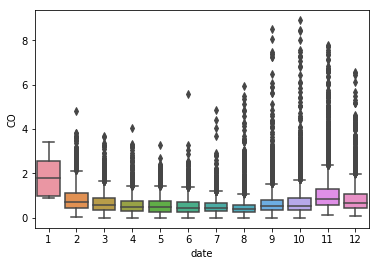

In [32]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["CO"] )



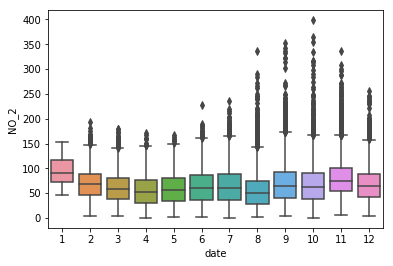

In [33]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["NO_2"] )

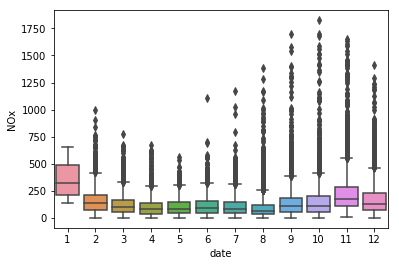

In [34]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["NOx"] )

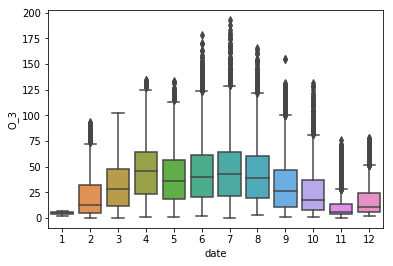

In [35]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["O_3"] )

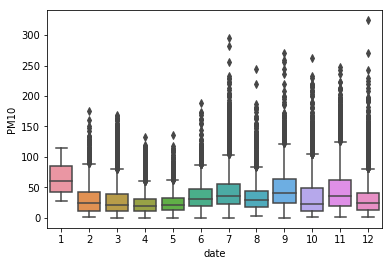

In [36]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["PM10"] )

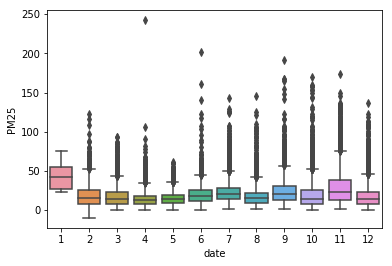

In [37]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["PM25"] )

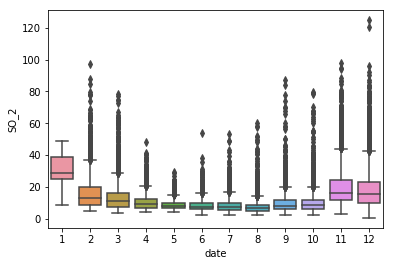

In [7]:
%matplotlib inline
sns.boxplot( x=pd.to_datetime(data1['date']).dt.month, y=data1["SO_2"] )